### Initialize the client

As seen in the "1kg.ipynb" example, we take the following steps to create the client object that will be used to obtain the information we desire and query the server. Plotting tools are also imported here.

In [281]:
import ga4gh.client as client
c = client.HttpClient("http://1kgenomes.ga4gh.org")

import sys
import collections
import math
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed
from IPython.display import display
import ipywidgets as widgets

### Acquiring annotation set

We query the server for the dataset, which is the 1k-genomes dataset. The dataset has a unique ID that can be used to acquire each variant set within the dataset. 

To access the different kinds of annotations, we access the annotation set using the unique variant set ID.

In [282]:
dataset = c.searchDatasets().next()

for variantSet in c.searchVariantSets(dataset.id):
    if variantSet.name == "functional-annotation":
        annotation = variantSet

annotationSet = c.searchVariantAnnotationSets(variantSetId=annotation.id).next()

In [283]:
def runSearch(startPos, endPos, chromosome, searchTerms, buckets):
    
    formatSearch = []
    
    for i in range(0,len(searchTerms)):
        #print(searchTerms[i])
        formatSearch.append({"id":searchTerms[i]})
        #formatSearch+="""{"id": """+"""\""""+searchTerms[i]+"""\""""+"}, "
    
    print(formatSearch)
    
    global windowCount
    #windowCount = ((int(endPos)-int(startPos))/int(window))
    windowCount = int(buckets)
    #print("windowCount = ",windowCount)
    startPoint = int(startPos)
    endPoint = (int(startPos)+(int(endPos)-int(startPos))/int(buckets))
    global yList
    yList=[]
    global xTickList 
    xTickList=[]
    
    for i in range(0,windowCount):
        #print("endPoint = ",endPoint)
        
        abc=c.searchVariantAnnotations(variantAnnotationSetId=annotationSet.id, start=startPoint, end=endPoint, referenceName=chromosome, effects=formatSearch)
    
        idList = []
        startEndList = []
        
        for annotation in abc:
            idList.append(annotation.variant_id)
    
        for ids in idList:
            important = c.getVariant(ids)
            startEndList.append(important.start)
            startEndList.append(important.end)
        countingStats(seVals=startEndList, windowValue=windowCount, yValList=yList, startPos=startPoint, endPos=endPoint)
        
        startPoint+=(int(endPos)-int(startPos))/int(buckets)
        endPoint+=(int(endPos)-int(startPos))/int(buckets)
        del idList[:]
        del startEndList[:]
    

In [284]:
def countingStats(seVals, windowValue, yValList,startPos, endPos):
    values = np.empty([int(len(seVals))/2,2], dtype=np.int32)
    
    j=0
    k=1
    for i in range(0,int(len(seVals))/2):
        values[i][0] = seVals[j]
        values[i][1] = seVals[k]
        j+=2
        k+=2
        
    testFunc(values, len(values), windowValue, yValList, startPos, endPos)
    #plotWindowHistogram(values, len(values), startPos, endPos)

In [285]:
def testFunc(xAxisTicks,yAxisValues, windowVals, yList,startPos, endPos):
     
    yList.append(yAxisValues)
    
    #print(yList)
    
    xTickList.append(xAxisTicks)
    #print(xTickList,"\n")
    
    if len(yList)==windowVals:
        plotWindowHistogram(xTickList, yList, windowVals, startPos, endPos)

In [286]:
def plotWindowHistogram(xAxisTicks, yAxisValues, windowVals, startPos, endPos):
    
    fig, ax = plt.subplots()
    
    endValues = np.empty([1,2], dtype=np.int32)

    #print(xAxisTicks)

    #if xAxisTicks.size==0:
    endValues[0][0] = startPos
    endValues[0][1] = endPos
    #else:
        #endValues[0][0] = xAxisTicks[0][0]
        #endValues[0][1] = xAxisTicks[-1][1]
    
    ax.set_xticklabels(endValues, rotation=90)
    
    for i in range(0,windowVals):
        plt.bar(i, yAxisValues[i], width=1, color=['maroon'])
    
    #h = plt.bar(xrange(len(xAxisTicks)), yAxisValues, label=xAxisTicks)
    #xticks_pos = [0.50*patch.get_width() + patch.get_xy()[0] for patch in h]
    #plt.xticks(xticks_pos, xAxisTicks,  ha='right', rotation=45)
    
    ax.set_title("intron_variants from "+str(startPos)+" to "+str(endPos))
    ax.set_ylim([0,int(math.ceil(max(yAxisValues)/5.0))*5])
    ax.set_xticklabels([endValues])
    plt.rcParams["figure.figsize"] = [10,10]
    
    plt.show()

[{'id': 'SO:0001627'}]


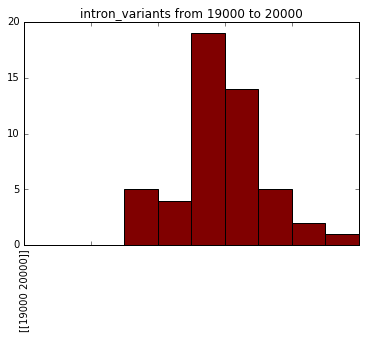

In [287]:
searchOntologyDict = {'transcript_ablation' : 'SO:0001893', 'splice_acceptor_variant' : 'SO:0001574', 'splice_donor_variant' : 'SO:0001575', 'stop_gained' : 'SO:0001587', 'frameshift_variant' : 'SO:0001589', 'stop_lost' : 'SO:0001578', 'start_lost' : 'SO:0002012', 'transcript_amplification' : 'SO:0001889', 'inframe_insertion' : 'SO:0001821', 'inframe_deletion' : 'SO:0001822', 'missense_variant' : 'SO:0001583', 'protein_altering_variant' : 'SO:0001818', 'splice_region_variant' : 'SO:0001630', 'incomplete_terminal_codon_variant' : 'SO:0001626', 'stop_retained_variant' : 'SO:0001567', 'synonymous_variant' : 'SO:0001819', 'coding_sequence_variant' : 'SO:0001580', 'mature_miRNA_variant' : 'SO:0001620', '5_prime_UTR_variant' : 'SO:0001623', '3_prime_UTR_variant' : 'SO:0001624', 'non_coding_transcript_exon_variant' : 'SO:0001792', 'intron_variant' : 'SO:0001627', 'NMD_transcript_variant' : 'SO:0001621', 'non_coding_transcript_variant' : 'SO:0001619', 'upstream_gene_variant' : 'SO:0001631', 'downstream_gene_variant' : 'SO:0001632', 'TFBS_ablation' : 'SO:0001892', 'TFBS_amplification' : 'SO:0001892', 'TF_binding_site_variant' : 'SO:0001782', 'regulatory_region_ablation' : 'SO:0001894', 'regulatory_region_amplification' : 'SO:0001891', 'feature_elongation' : 'SO:0001907', 'regulatory_region_variant' : 'SO:0001566', 'feature_truncation' : 'SO:0001906', 'intergenic_variant' : 'SO:0001628'}
shortDict = {'intron_variant' : 'SO:0001627', 'feature_truncation' : 'SO:0001906' , 'non_coding_transcript_exon_variant' : 'SO:0001792' , 'non_coding_transcript_variant' : 'SO:0001619', 'transcript_ablation' : 'SO:0001893'}
chromList = ('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18')


multiSelect = widgets.SelectMultiple(
    description="Transcript Effects",
    options=shortDict
)

interact(runSearch,
         startPos="10000",
         endPos="20000",
         chromosome=chromList,
         searchTerms=multiSelect,
         buckets="10",
         __manual="True"
         )